# Fraud Rules - Unsupervised Kmeans Clustering

In [1]:
'''
Import Libraries
'''

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import preprocessing
from sklearn.preprocessing import QuantileTransformer

from sklearn import metrics
import matplotlib.cm as cm
from scipy import stats


import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

<Figure size 504x360 with 0 Axes>

<AxesSubplot:xlabel='cor_cylindre_VG', ylabel='predicted_label'>

Text(0.5, 1.0, 'Feature:cor_cylindre_VG - distribution with class')

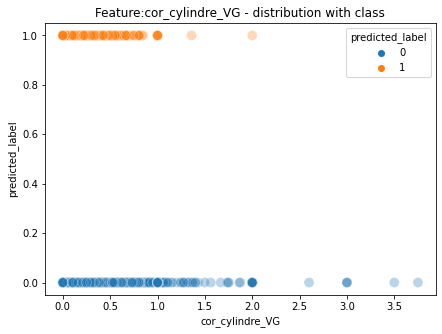

<Figure size 504x360 with 0 Axes>

<AxesSubplot:xlabel='Pourcent_remise_total', ylabel='predicted_label'>

Text(0.5, 1.0, 'Feature:Pourcent_remise_total - distribution with class')

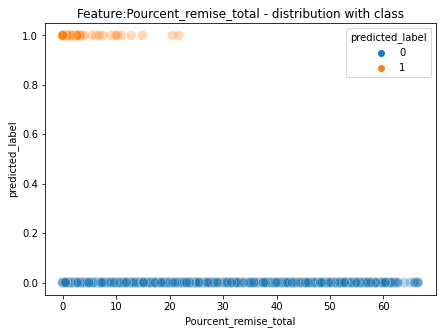

<Figure size 504x360 with 0 Axes>

<AxesSubplot:xlabel='Pourcent_remise_monture', ylabel='predicted_label'>

Text(0.5, 1.0, 'Feature:Pourcent_remise_monture - distribution with class')

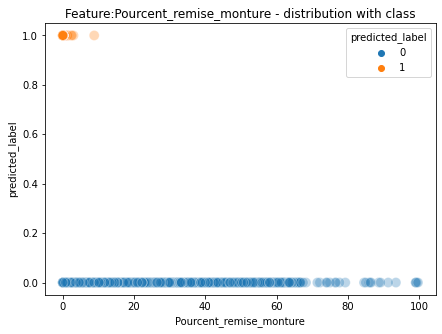

<Figure size 504x360 with 0 Axes>

<AxesSubplot:xlabel='PEC_REF', ylabel='predicted_label'>

Text(0.5, 1.0, 'Feature:PEC_REF - distribution with class')

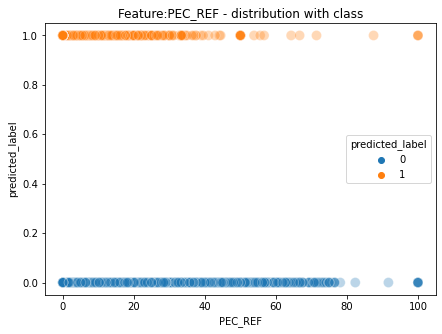

<Figure size 504x360 with 0 Axes>

<AxesSubplot:xlabel='PEC_ANN', ylabel='predicted_label'>

Text(0.5, 1.0, 'Feature:PEC_ANN - distribution with class')

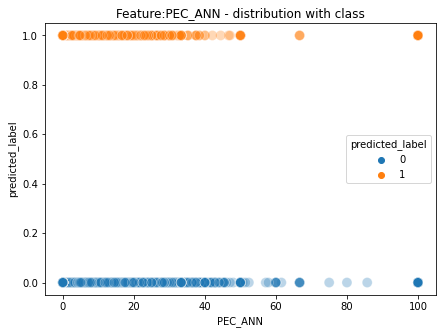

<Figure size 504x360 with 0 Axes>

<AxesSubplot:xlabel='dep_non_limit', ylabel='predicted_label'>

Text(0.5, 1.0, 'Feature:dep_non_limit - distribution with class')

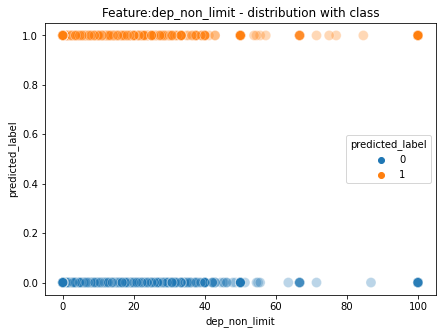

<Figure size 504x360 with 0 Axes>

<AxesSubplot:xlabel='dep_limit', ylabel='predicted_label'>

Text(0.5, 1.0, 'Feature:dep_limit - distribution with class')

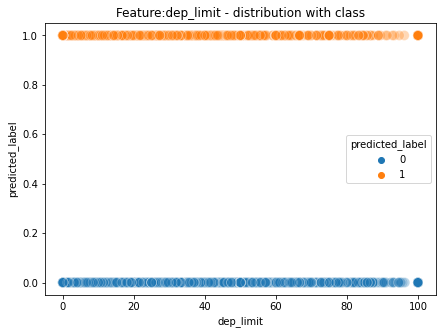

In [2]:
scatter_df = pd.read_csv('labeled_kmeans.csv')
#PEC_REF, PEC_ANN, dep_non_limit, dep_limit, Pourcent_remise_total, Pourcent_remise_monture, cor_cylindre_VG
top_features = ['cor_cylindre_VG', 'Pourcent_remise_total', 'Pourcent_remise_monture', 'PEC_REF', 'PEC_ANN', 'dep_non_limit', 'dep_limit']
#PEC_ANN,PEC_REF, cor_cylindre_VG, Pourcent_remise_monture,Pourcent_remise_total
i=0
# sns.set_style("white")
for feature in top_features:
    i+=1
    plt.figure(figsize=(7, 5))
    sns.scatterplot(data=scatter_df, x=feature, y='predicted_label', hue='predicted_label', alpha=0.3, s=100)
    plt.title(f'Feature:{feature} - distribution with class')
    plt.savefig('plots/kmeans_rules_scatter'+str(i)+'.png', bbox_inches='tight')
    plt.show()

In [10]:
scatter_df_1 = scatter_df[scatter_df['predicted_label'] == 1]

In [11]:
scatter_df_1

,ref_PS,fraud,cluster_id,predicted_label,dep_identique,dep_limit,dep_non_limit,PEC_ANN,PEC_FAC,PEC_REF,...,Prix_equipement,Pourcent_remise_monture,Pourcent_remise_total,cor_sphere_VG,cor_cylindre_VG,cor_addition_VG,facteur_correction,age_moyen,nb_prescripteurs,nb_PEC_par_prescripteurs
0,8c47fdd7c69650b,False,1,1,96.23,1.89,1.89,3.77,62.26,3.77,...,308.792453,0.0,0.000000,-0.301887,0.056604,0.226415,1.056604,45.396226,24,2.21
2,5076215e2ee1797,False,1,1,95.45,4.55,0.00,13.64,68.18,0.00,...,530.727273,0.0,0.000000,-0.272727,0.227273,0.181818,2.318182,34.863636,11,2.00
4,ced6f62ac55fd34,False,1,1,50.00,0.00,50.00,25.00,75.00,0.00,...,522.250000,0.0,0.000000,-0.500000,0.000000,0.000000,1.000000,43.750000,3,1.33
7,4af9c46d9f5bf13,False,1,1,25.00,75.00,0.00,0.00,75.00,6.25,...,355.125000,0.0,0.175994,0.000000,0.000000,0.000000,0.062500,51.750000,6,2.67
21,04a6b63a7273984,False,1,1,87.50,12.50,0.00,25.00,25.00,0.00,...,410.250000,0.0,0.000000,0.125000,0.000000,0.750000,2.500000,60.500000,8,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12572,761dc57323e0f96,False,1,1,36.36,27.27,36.36,9.09,81.82,3.03,...,517.151515,0.0,0.000000,-0.212121,0.030303,0.090909,0.909091,25.545455,6,5.50
12583,9ce40ddcf3d4b1b,False,1,1,81.82,18.18,0.00,18.18,68.18,0.00,...,387.500000,0.0,0.000000,-0.181818,0.000000,0.090909,0.590909,29.318182,6,3.67
12587,3506362e45cbc9d,False,1,1,66.67,8.33,25.00,16.67,83.33,0.00,...,513.833333,0.0,0.000000,1.000000,0.000000,0.166667,3.583333,36.166667,7,1.71
12592,f30c6c5b7863f29,False,1,1,46.15,53.85,0.00,0.00,76.92,0.00,...,563.807692,0.0,0.736749,0.038462,0.115385,0.307692,1.153846,50.653846,9,2.89


In [12]:
scatter_df_1[['cor_cylindre_VG', 'PEC_ANN', 'Pourcent_remise_monture', 'PEC_REF']].describe().T

,count,mean,std,min,25%,50%,75%,max
cor_cylindre_VG,1714.0,0.126190,0.163230,0.0,0.0,0.083333,0.176471,2.000000
PEC_ANN,1714.0,8.916453,11.938573,0.0,0.0,6.250000,12.900000,100.000000
Pourcent_remise_monture,1714.0,0.014626,0.248792,0.0,0.0,0.000000,0.000000,8.802817
PEC_REF,1714.0,5.629329,9.644201,0.0,0.0,2.105000,8.110000,100.000000


In [16]:
rule1 = scatter_df_1[scatter_df_1['cor_cylindre_VG'] <= 0.18]
rule1

,ref_PS,fraud,cluster_id,predicted_label,dep_identique,dep_limit,dep_non_limit,PEC_ANN,PEC_FAC,PEC_REF,...,Prix_equipement,Pourcent_remise_monture,Pourcent_remise_total,cor_sphere_VG,cor_cylindre_VG,cor_addition_VG,facteur_correction,age_moyen,nb_prescripteurs,nb_PEC_par_prescripteurs
0,8c47fdd7c69650b,False,1,1,96.23,1.89,1.89,3.77,62.26,3.77,...,308.792453,0.0,0.000000,-0.301887,0.056604,0.226415,1.056604,45.396226,24,2.21
4,ced6f62ac55fd34,False,1,1,50.00,0.00,50.00,25.00,75.00,0.00,...,522.250000,0.0,0.000000,-0.500000,0.000000,0.000000,1.000000,43.750000,3,1.33
7,4af9c46d9f5bf13,False,1,1,25.00,75.00,0.00,0.00,75.00,6.25,...,355.125000,0.0,0.175994,0.000000,0.000000,0.000000,0.062500,51.750000,6,2.67
21,04a6b63a7273984,False,1,1,87.50,12.50,0.00,25.00,25.00,0.00,...,410.250000,0.0,0.000000,0.125000,0.000000,0.750000,2.500000,60.500000,8,1.00
23,2d98458e2c6b336,False,1,1,69.70,26.26,4.04,16.16,76.77,1.01,...,478.969697,0.0,0.000000,-0.020202,0.121212,0.292929,1.565657,32.262626,27,3.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12569,bdd876448ca23c6,False,1,1,0.00,100.00,0.00,0.00,66.67,0.00,...,331.833333,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,44.166667,3,2.00
12572,761dc57323e0f96,False,1,1,36.36,27.27,36.36,9.09,81.82,3.03,...,517.151515,0.0,0.000000,-0.212121,0.030303,0.090909,0.909091,25.545455,6,5.50
12583,9ce40ddcf3d4b1b,False,1,1,81.82,18.18,0.00,18.18,68.18,0.00,...,387.500000,0.0,0.000000,-0.181818,0.000000,0.090909,0.590909,29.318182,6,3.67
12587,3506362e45cbc9d,False,1,1,66.67,8.33,25.00,16.67,83.33,0.00,...,513.833333,0.0,0.000000,1.000000,0.000000,0.166667,3.583333,36.166667,7,1.71


In [17]:
rule2 = scatter_df_1[scatter_df_1['Pourcent_remise_monture'] <= 5]
rule2

,ref_PS,fraud,cluster_id,predicted_label,dep_identique,dep_limit,dep_non_limit,PEC_ANN,PEC_FAC,PEC_REF,...,Prix_equipement,Pourcent_remise_monture,Pourcent_remise_total,cor_sphere_VG,cor_cylindre_VG,cor_addition_VG,facteur_correction,age_moyen,nb_prescripteurs,nb_PEC_par_prescripteurs
0,8c47fdd7c69650b,False,1,1,96.23,1.89,1.89,3.77,62.26,3.77,...,308.792453,0.0,0.000000,-0.301887,0.056604,0.226415,1.056604,45.396226,24,2.21
2,5076215e2ee1797,False,1,1,95.45,4.55,0.00,13.64,68.18,0.00,...,530.727273,0.0,0.000000,-0.272727,0.227273,0.181818,2.318182,34.863636,11,2.00
4,ced6f62ac55fd34,False,1,1,50.00,0.00,50.00,25.00,75.00,0.00,...,522.250000,0.0,0.000000,-0.500000,0.000000,0.000000,1.000000,43.750000,3,1.33
7,4af9c46d9f5bf13,False,1,1,25.00,75.00,0.00,0.00,75.00,6.25,...,355.125000,0.0,0.175994,0.000000,0.000000,0.000000,0.062500,51.750000,6,2.67
21,04a6b63a7273984,False,1,1,87.50,12.50,0.00,25.00,25.00,0.00,...,410.250000,0.0,0.000000,0.125000,0.000000,0.750000,2.500000,60.500000,8,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12572,761dc57323e0f96,False,1,1,36.36,27.27,36.36,9.09,81.82,3.03,...,517.151515,0.0,0.000000,-0.212121,0.030303,0.090909,0.909091,25.545455,6,5.50
12583,9ce40ddcf3d4b1b,False,1,1,81.82,18.18,0.00,18.18,68.18,0.00,...,387.500000,0.0,0.000000,-0.181818,0.000000,0.090909,0.590909,29.318182,6,3.67
12587,3506362e45cbc9d,False,1,1,66.67,8.33,25.00,16.67,83.33,0.00,...,513.833333,0.0,0.000000,1.000000,0.000000,0.166667,3.583333,36.166667,7,1.71
12592,f30c6c5b7863f29,False,1,1,46.15,53.85,0.00,0.00,76.92,0.00,...,563.807692,0.0,0.736749,0.038462,0.115385,0.307692,1.153846,50.653846,9,2.89


In [18]:
rule3 = scatter_df_1[scatter_df_1['PEC_REF'] <= 30]
rule3

,ref_PS,fraud,cluster_id,predicted_label,dep_identique,dep_limit,dep_non_limit,PEC_ANN,PEC_FAC,PEC_REF,...,Prix_equipement,Pourcent_remise_monture,Pourcent_remise_total,cor_sphere_VG,cor_cylindre_VG,cor_addition_VG,facteur_correction,age_moyen,nb_prescripteurs,nb_PEC_par_prescripteurs
0,8c47fdd7c69650b,False,1,1,96.23,1.89,1.89,3.77,62.26,3.77,...,308.792453,0.0,0.000000,-0.301887,0.056604,0.226415,1.056604,45.396226,24,2.21
2,5076215e2ee1797,False,1,1,95.45,4.55,0.00,13.64,68.18,0.00,...,530.727273,0.0,0.000000,-0.272727,0.227273,0.181818,2.318182,34.863636,11,2.00
4,ced6f62ac55fd34,False,1,1,50.00,0.00,50.00,25.00,75.00,0.00,...,522.250000,0.0,0.000000,-0.500000,0.000000,0.000000,1.000000,43.750000,3,1.33
7,4af9c46d9f5bf13,False,1,1,25.00,75.00,0.00,0.00,75.00,6.25,...,355.125000,0.0,0.175994,0.000000,0.000000,0.000000,0.062500,51.750000,6,2.67
21,04a6b63a7273984,False,1,1,87.50,12.50,0.00,25.00,25.00,0.00,...,410.250000,0.0,0.000000,0.125000,0.000000,0.750000,2.500000,60.500000,8,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12572,761dc57323e0f96,False,1,1,36.36,27.27,36.36,9.09,81.82,3.03,...,517.151515,0.0,0.000000,-0.212121,0.030303,0.090909,0.909091,25.545455,6,5.50
12583,9ce40ddcf3d4b1b,False,1,1,81.82,18.18,0.00,18.18,68.18,0.00,...,387.500000,0.0,0.000000,-0.181818,0.000000,0.090909,0.590909,29.318182,6,3.67
12587,3506362e45cbc9d,False,1,1,66.67,8.33,25.00,16.67,83.33,0.00,...,513.833333,0.0,0.000000,1.000000,0.000000,0.166667,3.583333,36.166667,7,1.71
12592,f30c6c5b7863f29,False,1,1,46.15,53.85,0.00,0.00,76.92,0.00,...,563.807692,0.0,0.736749,0.038462,0.115385,0.307692,1.153846,50.653846,9,2.89


In [20]:
combined_kmeans = pd.merge(rule3, rule2, on='ref_PS', how='inner')
combined_kmeans = pd.merge(combined_kmeans, rule1, on='ref_PS', how='inner')

combined_kmeans

,ref_PS,fraud_x,cluster_id_x,predicted_label_x,dep_identique_x,dep_limit_x,dep_non_limit_x,PEC_ANN_x,PEC_FAC_x,PEC_REF_x,...,Prix_equipement,Pourcent_remise_monture,Pourcent_remise_total,cor_sphere_VG,cor_cylindre_VG,cor_addition_VG,facteur_correction,age_moyen,nb_prescripteurs,nb_PEC_par_prescripteurs
0,8c47fdd7c69650b,False,1,1,96.23,1.89,1.89,3.77,62.26,3.77,...,308.792453,0.0,0.000000,-0.301887,0.056604,0.226415,1.056604,45.396226,24,2.21
1,ced6f62ac55fd34,False,1,1,50.00,0.00,50.00,25.00,75.00,0.00,...,522.250000,0.0,0.000000,-0.500000,0.000000,0.000000,1.000000,43.750000,3,1.33
2,4af9c46d9f5bf13,False,1,1,25.00,75.00,0.00,0.00,75.00,6.25,...,355.125000,0.0,0.175994,0.000000,0.000000,0.000000,0.062500,51.750000,6,2.67
3,04a6b63a7273984,False,1,1,87.50,12.50,0.00,25.00,25.00,0.00,...,410.250000,0.0,0.000000,0.125000,0.000000,0.750000,2.500000,60.500000,8,1.00
4,2d98458e2c6b336,False,1,1,69.70,26.26,4.04,16.16,76.77,1.01,...,478.969697,0.0,0.000000,-0.020202,0.121212,0.292929,1.565657,32.262626,27,3.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,bdd876448ca23c6,False,1,1,0.00,100.00,0.00,0.00,66.67,0.00,...,331.833333,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,44.166667,3,2.00
1257,761dc57323e0f96,False,1,1,36.36,27.27,36.36,9.09,81.82,3.03,...,517.151515,0.0,0.000000,-0.212121,0.030303,0.090909,0.909091,25.545455,6,5.50
1258,9ce40ddcf3d4b1b,False,1,1,81.82,18.18,0.00,18.18,68.18,0.00,...,387.500000,0.0,0.000000,-0.181818,0.000000,0.090909,0.590909,29.318182,6,3.67
1259,3506362e45cbc9d,False,1,1,66.67,8.33,25.00,16.67,83.33,0.00,...,513.833333,0.0,0.000000,1.000000,0.000000,0.166667,3.583333,36.166667,7,1.71
